distance 0.2211334438749598


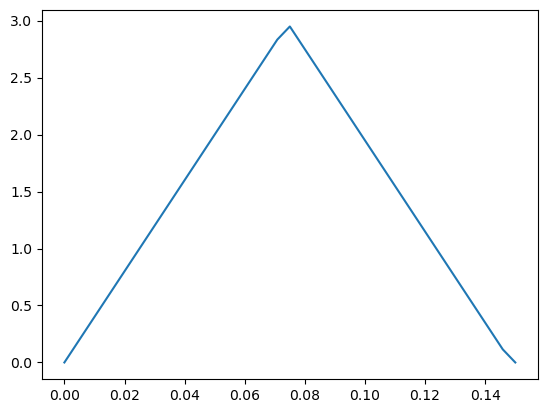

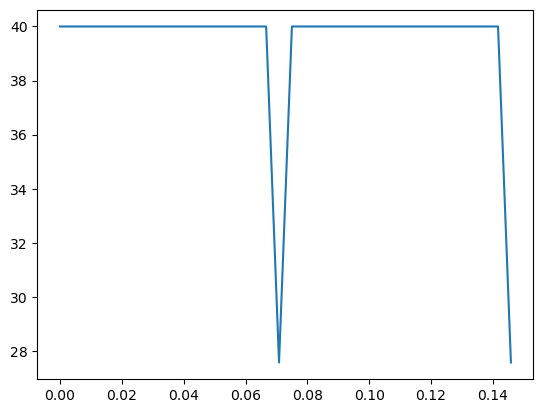

In [2]:
import utils
import numpy as np
import matplotlib.pyplot as plt

MAX_SPEED_FLEXPICKER = 10
MAX_ACCELERATION_FLEXPICKER = 100
TIME_STEP = 1/240

# On veut une vitesse de 1 * 10 = 10 m/s
vel_scaling_factor = 0.4
acc_scaling_factor = 1

init_pos = (0,0,0)
init_orn = (0,0,0,0)
target_pos = (0.1, 0.1, 0.17)
target_orn = (0,0,0,0)
print("distance", np.linalg.norm(np.array(init_pos)-np.array(target_pos)))
pos, orn, v = utils.ctraj_pilz_KDL(init_pos, init_orn, target_pos, target_orn, MAX_SPEED_FLEXPICKER, MAX_ACCELERATION_FLEXPICKER, vel_scaling_factor, acc_scaling_factor, 2*np.pi, TIME_STEP)

plt.plot(np.arange(0, len(v))/240, np.sqrt(v[:, 0]**2+v[:, 1]**2+v[:, 2]**2))
plt.show()
#plot the derivative of the speed
plt.plot(np.arange(0, len(v)-1)/240, np.sqrt((np.diff(v[:, 0])*240)**2+(np.diff(v[:, 1])*240)**2+(np.diff(v[:, 2])*240)**2))
plt.show()
# On atteind seulement 4.5 m/s alors que le robot devrait atteindre les 3 m/s également si la distance était trop petite pour atteindre la vitesse vouloue non ?

pybullet build time: Nov 29 2023 11:42:37


argv[0]=
Using device: cpu


100%|██████████| 10000/10000 [09:44<00:00, 17.09it/s]


Mean error: 0.010904751688241959
Std error: 0.007043328441876659
Max error: 0.034402430057525635


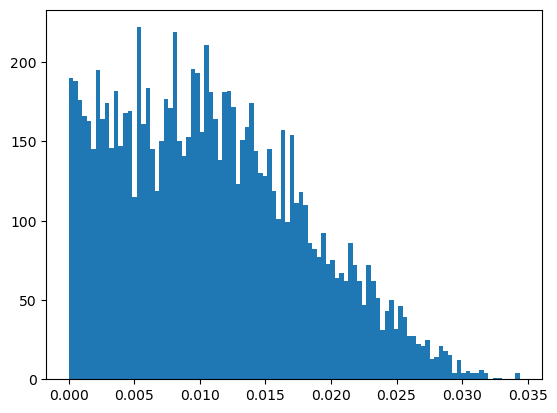

In [1]:
from utils import PickAndPlaceReward
import torch
from environment import TossingFlexpicker

env = TossingFlexpicker(GUI=False)
pickAndPlaceReward = PickAndPlaceReward()
pickAndPlaceReward.load_state_dict(torch.load("models/PaP_reward.pt"))
pickAndPlaceReward.evaluation(env, 10000)